<a href="https://colab.research.google.com/github/andysingal/04-CNNs/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
#import cv2
import os
import pathlib
#libraries for plotting the model
import pydot
import pydotplus
from pydotplus import graphviz
from tensorflow.keras.utils import plot_model


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

pd.options.display.max_rows=20

# Turn off future warnings 
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) 



# New Section

# New Section

In [2]:
print("numpy :", np.__version__)
print("pandas :", pd.__version__)
%tensorflow_version 2.x
print("tensorflow :", tf.__version__)

numpy : 1.19.5
pandas : 1.1.5
tensorflow : 2.4.1


In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


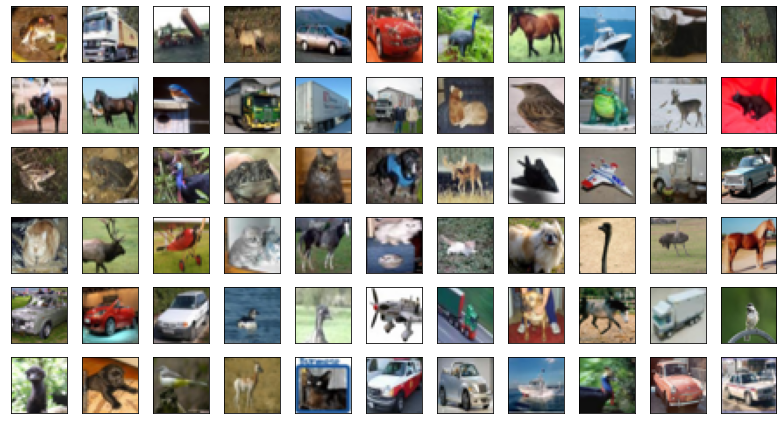

In [4]:
# Now lets take a look at some of our triaining images!

plt.figure(figsize=(11,6))
for i in range(66): 
    plt.subplot(6,11,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]) 
    plt.yticks([])
    
plt.tight_layout()

In [ ]:
#normalize

In [37]:
x_train = x_train/255
x_test = x_test/255

In [38]:
x_train.shape

(50000, 32, 32, 3)

ONE HOT ENCODING


In [39]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [40]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [41]:
y_train[0]

array([6], dtype=uint8)

In [10]:
y_cat_train.shape

(50000, 10)

BUILDING A MODEL

In [11]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER 
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

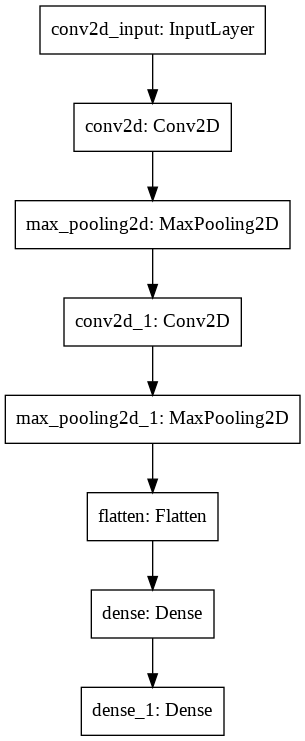

In [13]:
tf.keras.utils.plot_model(
    model, to_file='model.png'
)

TRAINING MODEL¶

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [16]:
 model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 41s 7ms/step - loss: 1.7168 - accuracy: 0.3736 - val_loss: 1.3228 - val_accuracy: 0.5351
Epoch 2/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2037 - accuracy: 0.5759 - val_loss: 1.3392 - val_accuracy: 0.5487
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0184 - accuracy: 0.6420 - val_loss: 1.0734 - val_accuracy: 0.6259
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9006 - accuracy: 0.6889 - val_loss: 1.0609 - val_accuracy: 0.6358
Epoch 5/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8149 - accuracy: 0.7180 - val_loss: 0.9743 - val_accuracy: 0.6828
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7366 - accuracy: 0.7474 - val_loss: 0.9665 - val_accuracy: 0.6767
Epoch 7/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6834 - accuracy: 0.7670 - val_loss: 1.0407 - val_ac

MODEL EVALUATION

In [18]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.513242,0.45522,1.322822,0.5351
1,1.163822,0.59240,1.339244,0.5487
2,1.008269,0.64710,1.073420,0.6259
3,0.900799,0.68806,1.060892,0.6358
4,0.823261,0.71682,0.974296,0.6828
5,0.758765,0.74092,0.966459,0.6767
6,0.705653,0.76054,1.040728,0.6627
7,0.660384,0.77442,1.058815,0.6831


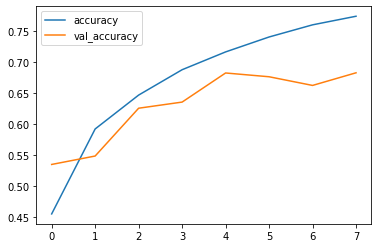

In [19]:
losses[['accuracy','val_accuracy']].plot()

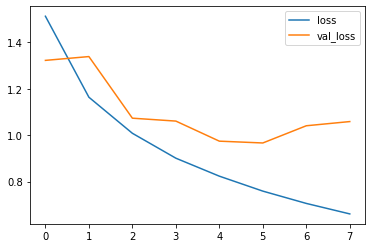

In [20]:
losses[['loss','val_loss']].plot()

In [21]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0588154792785645, 0.6830999851226807]


In [25]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71      1000
           1       0.82      0.81      0.81      1000
           2       0.73      0.49      0.59      1000
           3       0.50      0.50      0.50      1000
           4       0.62      0.63      0.62      1000
           5       0.71      0.45      0.55      1000
           6       0.72      0.82      0.76      1000
           7       0.62      0.80      0.70      1000
           8       0.70      0.85      0.77      1000
           9       0.70      0.83      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [26]:
confusion_matrix(y_test,predictions)

array([[648,  26,  32,  17,  24,   7,  12,  17, 152,  65],
       [ 11, 806,   5,   8,   3,   3,  13,   5,  40, 106],
       [ 58,  15, 491,  77, 102,  34,  78,  80,  41,  24],
       [ 22,  15,  37, 504,  96,  92,  85,  73,  33,  43],
       [ 17,   2,  25,  64, 632,  11,  70, 145,  26,   8],
       [ 10,  14,  31, 223,  56, 450,  42, 134,  15,  25],
       [  6,   9,  25,  56,  43,   9, 816,  15,   6,  15],
       [ 14,   6,  18,  43,  54,  24,   6, 798,   8,  29],
       [ 31,  37,   3,   7,   8,   3,   6,  11, 854,  40],
       [ 17,  53,   3,  17,   5,   4,   9,  15,  45, 832]])

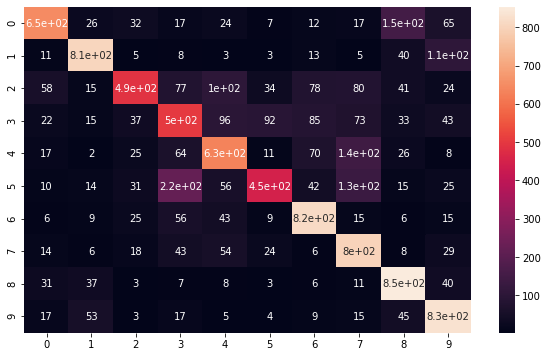

In [27]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

Confusion matrix, without normalization
[[648  26  32  17  24   7  12  17 152  65]
 [ 11 806   5   8   3   3  13   5  40 106]
 [ 58  15 491  77 102  34  78  80  41  24]
 [ 22  15  37 504  96  92  85  73  33  43]
 [ 17   2  25  64 632  11  70 145  26   8]
 [ 10  14  31 223  56 450  42 134  15  25]
 [  6   9  25  56  43   9 816  15   6  15]
 [ 14   6  18  43  54  24   6 798   8  29]
 [ 31  37   3   7   8   3   6  11 854  40]
 [ 17  53   3  17   5   4   9  15  45 832]]


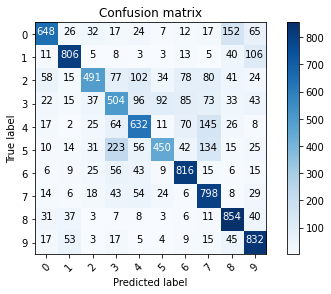

In [29]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



cm = confusion_matrix(y_test,predictions)
plot_confusion_matrix(cm, list(range(10)))



In [30]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

TypeError: ignored

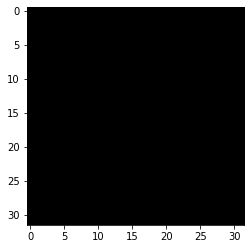

In [42]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[predictions[i]]))

PREDICTING IMAGES

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


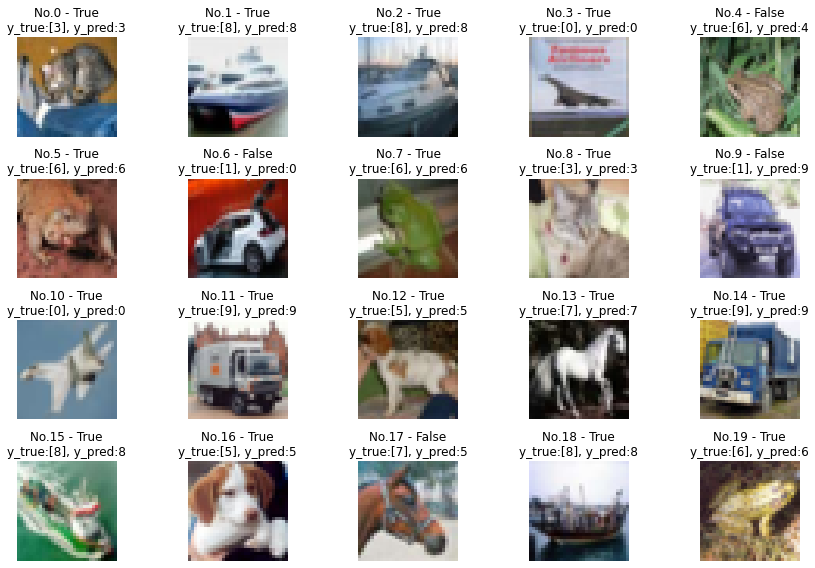

In [ ]:
fig = plt.figure(figsize=(12, 8))

ROW = 4
COLUMN = 5

for i in range(ROW * COLUMN):
    y_true = y_test[i]
    y_pred = model.predict_classes(x_test[i].reshape(1,32,32,3))[0]
    
    if y_true == y_pred:
        result = "True" # Correct answer from the model
    else:
        result = "False" # Incorrect answer from the model
    
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("No.{} - {}\ny_true:{}, y_pred:{}".format(i, result, y_true, y_pred))
    plt.axis("off")

fig.tight_layout()
fig.show()
